# Pandas
## Chapter 5
### Predictive Analytics for the Modern Enterprise 

This is jupyter notebook that can be used to follow along the code examples for **Chapter 4 Section 2 - Pandas** of the book.
The code examples go through some of the functionality that can be used to work with *Pandas Dataframes* using the Pandas library in python. 

The notebook has been tested using the following pre-requisite:

* Python V3.9.13 - https://www.python.org/
* Anaconda Navigator V3 for Python 3.9 - https://www.anaconda.com/
* Jupyter - V6.4.12 - https://jupyter.org/ 
* Desktop computer - macOS Ventura V13.1 

### Installation

In case you do not have pandas installed in your environment you can install it using the following command.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Import and View data using a dataframe

In [2]:
import pandas as pd # Give pandas an alias

Provided data from the Palmer Archipelago (Antarctica) penguin dataset.

License: CC0

* Sourced from https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

* Raw data used: https://raw.githubusercontent.com/paforme/predictiveanalytics/main/Chapter4/Datasets/penguins.csv

This module contains one pandas Dataframe: data.

In [3]:
url = "https://raw.githubusercontent.com/paforme/predictiveanalytics/main/Chapter4/Datasets/penguins.csv" 
penguins = pd.read_csv(url) #Read the data from the URL in a Pandas dataframe

In [4]:
type(penguins) #Confirm The data is ready in a Pandas Dataframe

pandas.core.frame.DataFrame

In [5]:
penguins #A view of the data. 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
penguins.describe() #Quick Statistical analysis

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
penguins.info() #DF summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Visualize the data

In [8]:
import matplotlib as mpl

In [9]:
%matplotlib inline 
#Jupiter Magic <- Instead of putting this to disk it will push it to the inline browser

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

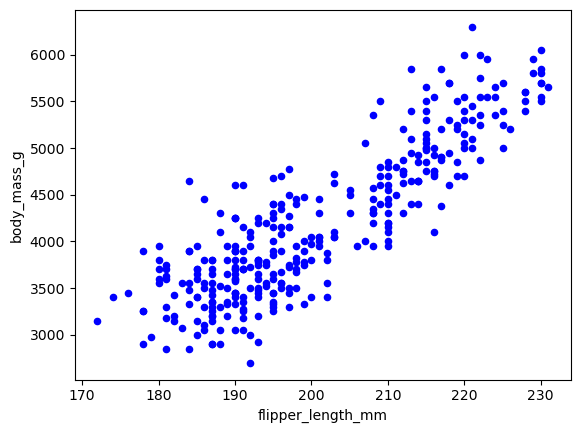

In [10]:
penguins.plot.scatter(x='flipper_length_mm', y='body_mass_g', style='o', c = 'blue') #Flipper Length vs Body Mass scatter plot

body_mass_g    Axes(0.125,0.11;0.775x0.77)
dtype: object

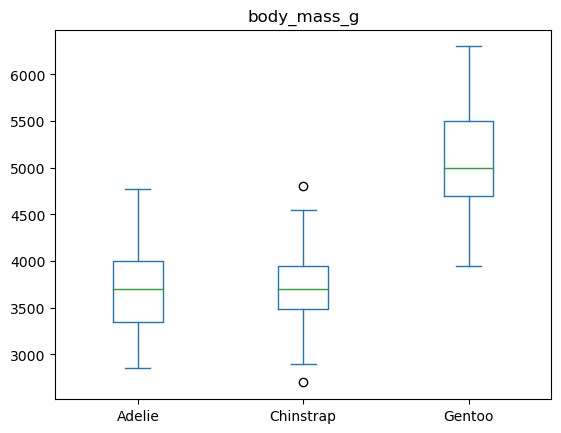

In [11]:
penguins.plot.box(column="body_mass_g", by="species") #Box plot to observe body mass ranges per species

array([<Axes: title={'center': 'FEMALE'}, ylabel='Frequency'>,
       <Axes: title={'center': 'MALE'}, ylabel='Frequency'>], dtype=object)

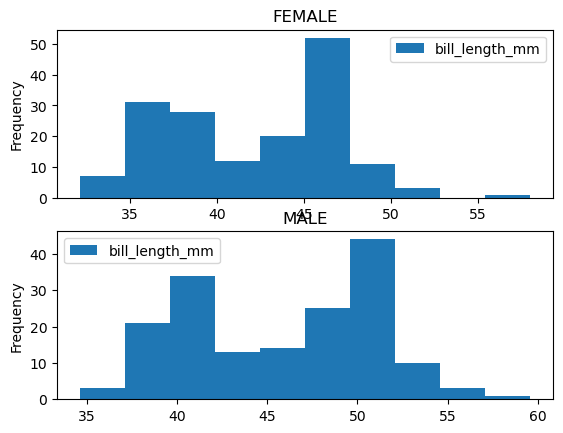

In [12]:
penguins.plot.hist(by='sex', column='bill_length_mm') #Histogram to compare bill length across males and females

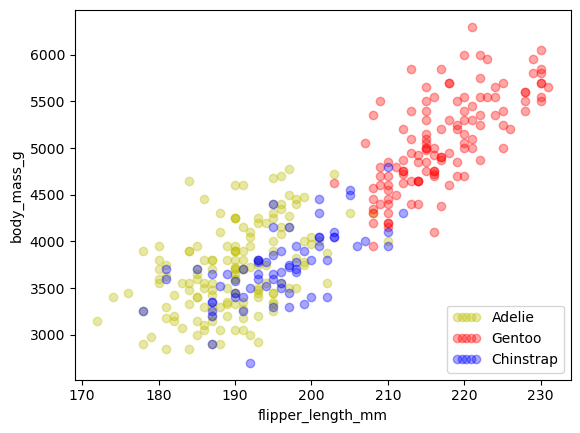

In [13]:
ax = penguins[penguins.species == 'Adelie'].plot(x='flipper_length_mm', y='body_mass_g', style='yo', label='Adelie', alpha=0.35)
ax = penguins[penguins.species == 'Gentoo'].plot(x='flipper_length_mm', y='body_mass_g', style='ro', label='Gentoo', alpha=0.35, ax=ax)
ax = penguins[penguins.species == 'Chinstrap'].plot(x='flipper_length_mm', y='body_mass_g', style='bo', label='Chinstrap'   , alpha=0.35, ax=ax)
ax.legend('Adelie Gentoo Chinstrap'.split(), numpoints=5, loc='lower right') 
_ = ax.set_ylabel('body_mass_g') # Stacked Visualization


### Data cleansing and modification

In [14]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
penguins.sex.unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [16]:
import numpy as np 
penguins.sex.replace([np.nan], ['Unknown'], inplace=True) #Replace all empty sex by Unknown

In [17]:
penguins.sex.unique()

array(['MALE', 'FEMALE', 'Unknown'], dtype=object)

In [18]:
penguins.isnull().any() #Look for null values

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                  False
dtype: bool

In [19]:
penguins.dropna(subset=['body_mass_g'], inplace=True) #Drop the subset where body_mass is null

In [20]:
penguins.isnull().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [21]:
penguins #Relook at the data again

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Continue with data exploration

### Reading data from different data sources

#### Importing data from a csv file in to a pandas dataframe

In [22]:
from pandas import options, read_csv

In [23]:
options.display.max_rows = 8
options.display.max_columns = 83
options.display.width = 100

Data source: http://www.cs.toronto.edu/~delve/data/abalone/desc.html

You can download a copy of the data from https://github.com/paforme/predictiveanalytics/blob/main/Chapter4/Datasets/Dataset.data

**NOTE:** Be sure to change the path below to wherever you have downloaded that file, either an absolute path or a relative path (relative to the location of where your notebook is saved)

In [24]:
local_ds = './Datasets/Abalone/Dataset.data'
abalone = read_csv(local_ds, delim_whitespace=True)
abalone

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In your python envionment install pymongo: 

**pip3 install pymongo**

#### Importing data from a mongodb database in to a pandas dataframe

The emissions data is sourced from: 
https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022?resource=download

Pre-requisites: 
* Running MongoDB Server enviroment. You can setup a free cluster using https://cloud.mongodb.com
* MongoDB Compass. You can download MongoDB Compass here: https://www.mongodb.com/try/download/compass

Import the emissions csv file GCB2022v27_MtCO2_flat.csv in to MongoDB using the MongoDB Compass Client. Basic steps: 

1. Download the data set from https://github.com/paforme/predictiveanalytics/blob/main/Chapter4/Datasets/GCB2022v27_MtCO2_flat.csv
2. Connect to your MongoDB Cluster using compass: https://www.mongodb.com/docs/compass/current/connect/
3. Click on Databases and press "Create database"
4. Use Database Name: pandas
       Collection Name: emissions
   Click on "Create Database"
5. Go to the "pandas -> emissions" collection in compass and press "Add Data" -> "Import JSON or CSV File"
6. Select the "GCB2022v27_MtCO2_flat.csv" from the downloaded dataset and select "Input file type" as "CSV." Ensure the delimiter is set to "comma." Press "Import" 

In [25]:
from pymongo import MongoClient #Import MongoDB client

If you are connecting to MongoDB use your connection URI in the MongoClient below. This will vary depending on if the MongoDB Server is local or running in the cloud. If you are using MongoDB Atlas it has its own URI format.

Ensure that you change the parameter passed to MongoClient below to the connection string of your MongoDB server.

In [27]:
connection = MongoClient("mongodb+srv://<fake_user:fake_password>@<fake-server.somewhere.mongodb.xyz>/?retryWrites=true&w=majority") # The code is used to connect to a MongoDB Atlas database
database = connection.pandas
collection = database.emissions
emissions = pd.DataFrame(list(collection.find())) # Load the data in a Pandas dataframe. ‘collection.find()’ does a query on the MongoDB collection to return all records. An SQL equivalent would be SELECT * from emissions. 


In [28]:
emissions

,_id,Country,ISO 3166-1 alpha-3,Year,Total,Per Capita,Coal,Oil,Gas,Cement,Flaring,Other
0,65b36cee9cf222b8c3f7ee97,Afghanistan,AFG,1750,0,\r,NaN,NaN,NaN,NaN,NaN,NaN
1,65b36cee9cf222b8c3f7ee98,Afghanistan,AFG,1751,0,\r,NaN,NaN,NaN,NaN,NaN,NaN
2,65b36cee9cf222b8c3f7ee99,Afghanistan,AFG,1752,0,\r,NaN,NaN,NaN,NaN,NaN,NaN
3,65b36cee9cf222b8c3f7ee9a,Afghanistan,AFG,1753,0,\r,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
63100,65b36d199cf222b8c3f8e513,Global,WLD,2018,36826.506600,4.792753\r,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706
63101,65b36d199cf222b8c3f8e514,Global,WLD,2019,37082.558969,4.775633\r,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573
63102,65b36d199cf222b8c3f8e515,Global,WLD,2020,35264.085734,4.497423\r,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685
63103,65b36d199cf222b8c3f8e516,Global,WLD,2021,37123.850352,4.693699\r,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746


In [29]:
emissions.columns #List pandas frame columns

Index(['_id', 'Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Per Capita', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other'],
      dtype='object')

In [30]:
emissions_filter = ['_id', 'Country', 'ISO 3166-1 alpha-3', 'Year', 'Total']

In [31]:
emissions_filter

['_id', 'Country', 'ISO 3166-1 alpha-3', 'Year', 'Total']

In [32]:
emissions[emissions_filter]

,_id,Country,ISO 3166-1 alpha-3,Year,Total
0,65b36cee9cf222b8c3f7ee97,Afghanistan,AFG,1750,0
1,65b36cee9cf222b8c3f7ee98,Afghanistan,AFG,1751,0
2,65b36cee9cf222b8c3f7ee99,Afghanistan,AFG,1752,0
3,65b36cee9cf222b8c3f7ee9a,Afghanistan,AFG,1753,0
...,...,...,...,...,...
63100,65b36d199cf222b8c3f8e513,Global,WLD,2018,36826.506600
63101,65b36d199cf222b8c3f8e514,Global,WLD,2019,37082.558969
63102,65b36d199cf222b8c3f8e515,Global,WLD,2020,35264.085734
63103,65b36d199cf222b8c3f8e516,Global,WLD,2021,37123.850352


In [33]:
emissions.loc[:, emissions_filter] #Create a new df with less columns and all rows.

,_id,Country,ISO 3166-1 alpha-3,Year,Total
0,65b36cee9cf222b8c3f7ee97,Afghanistan,AFG,1750,0
1,65b36cee9cf222b8c3f7ee98,Afghanistan,AFG,1751,0
2,65b36cee9cf222b8c3f7ee99,Afghanistan,AFG,1752,0
3,65b36cee9cf222b8c3f7ee9a,Afghanistan,AFG,1753,0
...,...,...,...,...,...
63100,65b36d199cf222b8c3f8e513,Global,WLD,2018,36826.506600
63101,65b36d199cf222b8c3f8e514,Global,WLD,2019,37082.558969
63102,65b36d199cf222b8c3f8e515,Global,WLD,2020,35264.085734
63103,65b36d199cf222b8c3f8e516,Global,WLD,2021,37123.850352


In [34]:
new_emissions = emissions.loc[:,emissions_filter] # Create a new dataframe with the subset of the data

In [35]:
new_emissions

,_id,Country,ISO 3166-1 alpha-3,Year,Total
0,65b36cee9cf222b8c3f7ee97,Afghanistan,AFG,1750,0
1,65b36cee9cf222b8c3f7ee98,Afghanistan,AFG,1751,0
2,65b36cee9cf222b8c3f7ee99,Afghanistan,AFG,1752,0
3,65b36cee9cf222b8c3f7ee9a,Afghanistan,AFG,1753,0
...,...,...,...,...,...
63100,65b36d199cf222b8c3f8e513,Global,WLD,2018,36826.506600
63101,65b36d199cf222b8c3f8e514,Global,WLD,2019,37082.558969
63102,65b36d199cf222b8c3f8e515,Global,WLD,2020,35264.085734
63103,65b36d199cf222b8c3f8e516,Global,WLD,2021,37123.850352


In [36]:
new_emissions.info() # Notice the memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 63104 non-null  object
 1   Country             63104 non-null  object
 2   ISO 3166-1 alpha-3  61472 non-null  object
 3   Year                63104 non-null  object
 4   Total               62904 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB


In [37]:
for cat in 'Country Year'.split():
    new_emissions[cat] = new_emissions[cat].astype('category') #Convert Country and Year to categories to save memory

In [38]:
new_emissions.info() # Notice the memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   _id                 63104 non-null  object  
 1   Country             63104 non-null  category
 2   ISO 3166-1 alpha-3  61472 non-null  object  
 3   Year                63104 non-null  category
 4   Total               62904 non-null  object  
dtypes: category(2), object(3)
memory usage: 1.7+ MB


In [39]:
sorted(new_emissions.Country.cat.categories) # Since countries are categories they are listed as such. 

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'F

In [ ]:
penguins.info() #We can try the same on the penguins dataframe

In [ ]:
new_penguins = penguins 
new_penguins['species'] = new_penguins['species'].astype('category') 

In [ ]:
new_penguins.info() #Notice the reduced memory usage

### Data filtering and grouping

http://pandas.pydata.org/pandas-docs/stable/text.html

In [47]:
convert_dictert_dict = {'Year': int,
                'Total': float,
                } #Define a conversion dictionary
 
emissions = emissions.astype(convert_dict) #Apply the dictionary
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 63104 non-null  object 
 1   Country             63104 non-null  object 
 2   ISO 3166-1 alpha-3  61472 non-null  object 
 3   Year                63104 non-null  int64  
 4   Total               62904 non-null  float64
 5   Per Capita          63104 non-null  object 
 6   Coal                21744 non-null  float64
 7   Oil                 21717 non-null  float64
 8   Gas                 21618 non-null  float64
 9   Cement              20814 non-null  float64
 10  Flaring             21550 non-null  object 
 11  Other               1620 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 5.8+ MB


In [53]:
emissions[emissions.Year == 2020] #returns the actual records

,_id,Country,ISO 3166-1 alpha-3,Year,Total,Per Capita,Coal,Oil,Gas,Cement,Flaring,Other
270,65b36cee9cf222b8c3f7efa5,Afghanistan,AFG,2020,11.681766,0.299746\r,4.150072,7.219776,0.251244,0.060674,0,NaN
542,65b36cee9cf222b8c3f7f0b5,Albania,ALB,2020,4.728559,1.649392\r,0.331439,3.217576,0.131178,1.048179,0.000188,NaN
814,65b36cee9cf222b8c3f7f1c5,Algeria,DZA,2020,172.504477,3.970031\r,1.098537,54.540075,88.308310,11.028039,17.529515,NaN
1086,65b36cef9cf222b8c3f7f2d5,Andorra,AND,2020,0.448884,5.777148\r,0.000000,0.448884,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
62286,65b36d189cf222b8c3f8e1e5,Zambia,ZMB,2020,7.280663,0.384656\r,2.291770,4.027911,0.000000,0.960983,0,NaN
62558,65b36d189cf222b8c3f8e2f5,Zimbabwe,ZWE,2020,10.607897,0.676970\r,6.721571,3.316712,0.000000,0.569615,0,NaN
62830,65b36d189cf222b8c3f8e405,International Transport,XIT,2020,938.508679,\r,NaN,938.508679,NaN,NaN,NaN,NaN
63102,65b36d199cf222b8c3f8e515,Global,WLD,2020,35264.085734,4.497423\r,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685


In [49]:
emissions[emissions.Total > 300] #returns actual records where total emissions are above 300

,_id,Country,ISO 3166-1 alpha-3,Year,Total,Per Capita,Coal,Oil,Gas,Cement,Flaring,Other
3237,65b36cf19cf222b8c3f7fb3c,Australia,AUS,1995,305.002996,16.941788\r,155.718942,96.126544,39.830983,3.357750,7.060714,2.908064
3238,65b36cf19cf222b8c3f7fb3d,Australia,AUS,1996,311.886129,17.125455\r,160.375191,98.697016,39.765246,3.243616,6.761052,3.044008
3239,65b36cf19cf222b8c3f7fb3e,Australia,AUS,1997,320.282630,17.396973\r,167.670194,98.388038,41.074314,3.184589,6.687345,3.278150
3240,65b36cf19cf222b8c3f7fb3f,Australia,AUS,1998,334.075978,17.959464\r,177.596365,99.146315,43.488447,3.475413,6.901959,3.467480
...,...,...,...,...,...,...,...,...,...,...,...,...
63100,65b36d199cf222b8c3f8e513,Global,WLD,2018,36826.506600,4.792753\r,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706
63101,65b36d199cf222b8c3f8e514,Global,WLD,2019,37082.558969,4.775633\r,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573
63102,65b36d199cf222b8c3f8e515,Global,WLD,2020,35264.085734,4.497423\r,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685
63103,65b36d199cf222b8c3f8e516,Global,WLD,2021,37123.850352,4.693699\r,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746


In [51]:
emissions[emissions.Total > 300].sum(numeric_only=True).Total

3037082.235283

In [ ]:
emissions.Country.str.contains('Afg')

In [ ]:
emissions[emissions.Country.str.contains('Afg')] #Sub-string matching

In [ ]:
max(emissions.Country.str.len()) #Length of longest Country name

In [ ]:
min(emissions.Country.str.len()) #Length of shortest Country name

In [ ]:
emissions[(emissions.Country.isin(['Afghanistan', 'Pakistan', 'Albania'])) & (emissions.Year == '2020')] #AND condition

In [ ]:
emissions.info()

In [52]:
convert_dict = {'Coal': float,
                'Oil': float,
                'Gas': float,
                'Cement': float
                } #Define a conversion dictionary
 
emissions = emissions.astype(convert_dict) #Apply the dictionary
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 63104 non-null  object 
 1   Country             63104 non-null  object 
 2   ISO 3166-1 alpha-3  61472 non-null  object 
 3   Year                63104 non-null  int64  
 4   Total               62904 non-null  float64
 5   Per Capita          63104 non-null  object 
 6   Coal                21744 non-null  float64
 7   Oil                 21717 non-null  float64
 8   Gas                 21618 non-null  float64
 9   Cement              20814 non-null  float64
 10  Flaring             21550 non-null  object 
 11  Other               1620 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 5.8+ MB


In [ ]:
grouped = emissions.groupby('Country') #Group by Country

In [ ]:
grouped.count()

In [ ]:
grouped.first()

In [ ]:
grouped.last()

In [ ]:
grouped.get_group('Yemen')

In [ ]:
grouped_filter = ['Coal', 'Oil', 'Gas', 'Cement'] #Define a filter to get only the needed fields
grouped_new = grouped[grouped_filter] #Get the filtered group results in a new data frame
grouped_new = grouped_new.sum() #Sum all the values by Country

In [ ]:
grouped_new = emissions.groupby('Country').sum(numeric_only=True)

In [ ]:
grouped_new

In [ ]:
grouped_plot = grouped_new[grouped_new.index.isin(['Angola','United Arab Emirates','Viet Nam'])] #Filter the dataframe for specific countries

In [ ]:
grouped_plot.plot.bar() #Plot the data

In [ ]:
grouped_new.sort_values(by=['Oil'], ascending=False) #Ascending sort by Oil 